<a href="https://colab.research.google.com/github/nnbphuong/datascience4biz/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLUSTERING**

> Phuong Nguyen  @ <a href="https://DataScience.vn" target="_blank">DataScience.vn</a>
> 
> Dataset: Utilities: https://gist.github.com/nnbphuong/c4d1bba6350925a4d92f00231b075510 
>
> Corporate data on 22 public utilities in the United States, 8 variables:
> *   Fixed-charge covering ratio (income/debt)
> *   Rate of return on capital
> *   Cost per kilowatt capacity
> *   Annual load factor
> *   Growth in peak demand
> *   Sales (kilowatthour use per year)
> *   % nuclear
> *   Fuel costs (cents per kilowatthour)


## Import required packages

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data
Load the data, set row names (index) to the utilities column (company) and remove it. Convert all columns to `float`

In [7]:
utilities_df = pd.read_csv('https://gist.githubusercontent.com/nnbphuong/c4d1bba6350925a4d92f00231b075510/raw/ecb16ca0af0f83034e5d87e474aed86b3b37501c/Utilities.csv')
utilities_df.set_index('Company', inplace=True)

# while not required, the conversion of integer data to float will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
utilities_df.head(5)

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044


# Measure distance between two records
Compute Euclidean distance matrix (to compute other metrics, change the name of `metric` argument)

In [8]:
d = pairwise.pairwise_distances(utilities_df, metric='euclidean')
pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index).head(5)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,Nevada,New England,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,8364.031051,2923.136103,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,12353.062698,1066.579432,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,8229.223281,3058.707429,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,11018.057812,271.452731,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,14141.022579,2854.099482,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300


In [16]:
pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances>,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances>,
 'precomputed': None}

## Normalizing

Here are two ways to normalize the input variables. Pandas calculates by default the sample standard deviation, whereas scikit-learn uses the population standard deviation. The normalized data from the two methods will therefore differ slightly. We will use the Pandas approach as it is equivalent to the R implementation of scale.

In [14]:
# scikit-learn uses population standard deviation
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

# pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()

utilities_df_norm[['Sales', 'Fuel_Cost']].head(5)

,Sales,Fuel_Cost
Company,,
Arizona,0.045903,-0.853675
Boston,-1.077764,0.813297
Central,0.083931,-0.080431
Commonwealth,-0.701706,-0.724202
NY,-1.581428,1.692638


In [15]:
# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']], metric='euclidean')
pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index).head(5)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,Nevada,New England,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638,0.461292,0.738650,2.369479,2.425975,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,0.521491,2.761745,1.252350
Boston,2.010329,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654,1.557738,1.719632,3.756513,0.684393,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255,1.100595,1.479261
Central,0.774179,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777,0.419254,1.102287,2.375975,1.737322,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,0.838967,2.034824,0.510365
Commonwealth,0.758738,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230,0.629994,0.138758,3.106084,2.153831,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,0.243408,2.547116,1.502093
NY,3.021907,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561,2.566439,2.705445,4.597006,0.846291,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786,0.952507,2.328691


## Agglomerative clustering


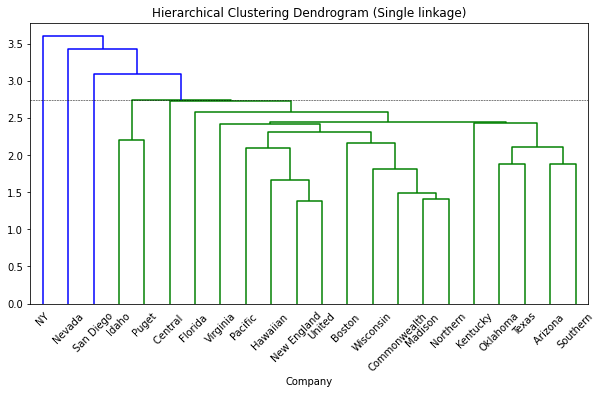

In [17]:
Z = linkage(utilities_df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

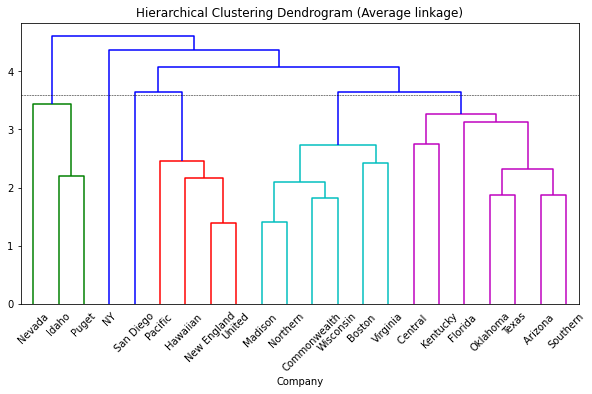

In [18]:
Z = linkage(utilities_df_norm, method='average')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

## Find cluster membership

In [19]:
memb = fcluster(linkage(utilities_df_norm, 'single'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


In [21]:
memb = fcluster(linkage(utilities_df_norm, 'average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  1: Idaho, 5: Nevada, 1: Puget
2 :  2: Hawaiian , 2: New England, 2: Pacific , 2: United
3 :  4: San Diego
4 :  2: Boston , 2: Commonwealth, 2: Madison , 2: Northern, 2: Wisconsin, 2: Virginia
5 :  2: Arizona , 3: Central , 2: Florida , 2: Kentucky, 2: Oklahoma, 2: Southern, 2: Texas
6 :  6: NY


## Visualize cluster features with heatmap

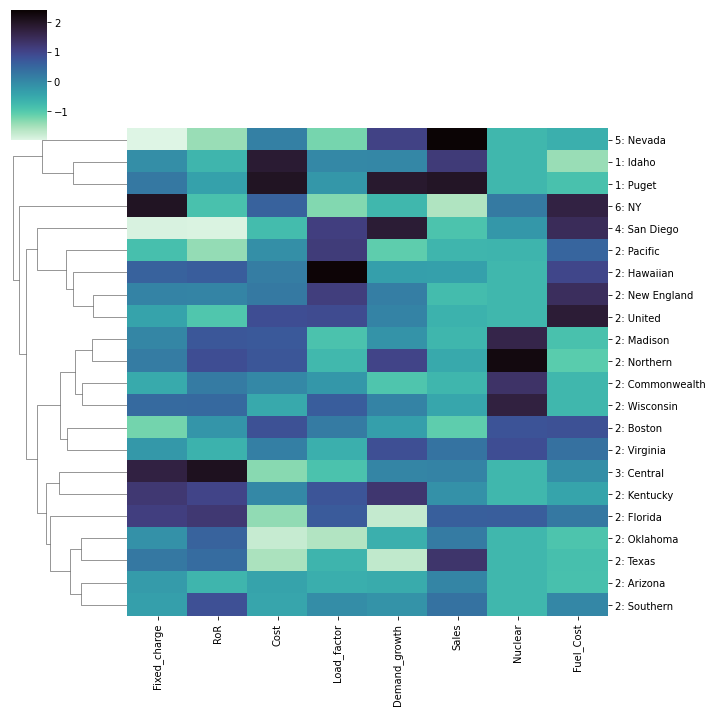

In [20]:
utilities_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, utilities_df_norm.index)]
sns.clustermap(utilities_df_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

## k-Means clustering

In [22]:
# Load and preprocess data
utilities_df = pd.read_csv('https://gist.githubusercontent.com/nnbphuong/c4d1bba6350925a4d92f00231b075510/raw/ecb16ca0af0f83034e5d87e474aed86b3b37501c/Utilities.csv')
utilities_df.set_index('Company', inplace=True)
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

# Normalized distance
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Arizona , Central , Florida , Oklahoma, Southern, Texas
1 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
2 :  Hawaiian , Kentucky, New England, Pacific , United
3 :  Idaho, Nevada, Puget
4 :  San Diego
5 :  NY


## Cluster centroids and squared distances for k-means

In [23]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   Fixed_charge    RoR   Cost  ...  Sales  Nuclear  Fuel_Cost
0         0.393  0.759 -1.177  ...  0.445   -0.503     -0.416
1        -0.217  0.249  0.327  ... -0.527    1.470     -0.369
2         0.133 -0.126  0.239  ... -0.533   -0.720      0.888
3        -0.614 -0.853  1.370  ...  1.900   -0.731     -0.988
4        -1.964 -1.978 -0.800  ... -0.923   -0.226      1.504
5         2.085 -0.883  0.592  ... -1.619    0.219      1.732

[6 rows x 8 columns]


In [24]:
withinClusterSS = [0] * 6
clusterCount = [0] * 6
for cluster, distance in zip(kmeans.labels_, kmeans.transform(utilities_df_norm)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print('Cluster {} ({} members): {:5.2f} within cluster'.format(cluster, 
        clusterCount[cluster], withinClusterSS[cluster]))

Cluster 0 (6 members): 20.28 within cluster
Cluster 1 (6 members): 15.63 within cluster
Cluster 2 (5 members): 16.02 within cluster
Cluster 3 (3 members):  9.99 within cluster
Cluster 4 (1 members):  0.00 within cluster
Cluster 5 (1 members):  0.00 within cluster


In [25]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(utilities_df_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=utilities_df_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (6 members): 20.28 within cluster 
Cluster 1 (6 members): 15.63 within cluster 
Cluster 2 (5 members): 16.02 within cluster 
Cluster 3 (3 members): 9.99 within cluster 
Cluster 4 (1 members): 0.00 within cluster 
Cluster 5 (1 members): 0.00 within cluster 


## Visualize cluster centroids with profile plot

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,0.393352,0.758801,-1.176527,-0.533952,-0.801203,0.444577,-0.502869,-0.416385,Cluster 0
1,-0.216848,0.249478,0.326792,-0.270105,0.085044,-0.526630,1.470004,-0.369144,Cluster 1
2,0.132630,-0.126052,0.238995,1.299214,0.019396,-0.533406,-0.720475,0.888389,Cluster 2
3,-0.614402,-0.852787,1.370418,-0.491890,1.015056,1.900210,-0.731447,-0.988493,Cluster 3
4,-1.964237,-1.977857,-0.799662,1.129434,1.890361,-0.922638,-0.225529,1.504241,Cluster 4
5,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470,Cluster 5


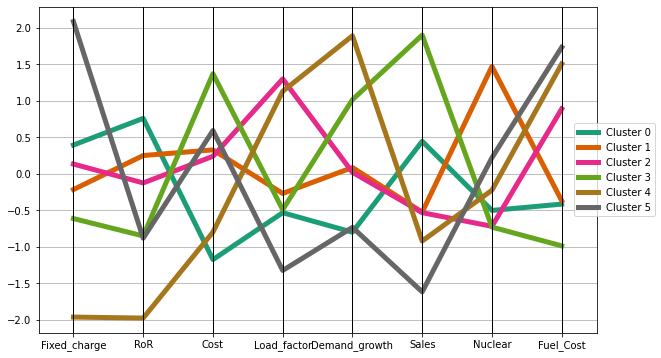

In [26]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [0]:
utilities_df_norm.groupby(kmeans.labels_).mean()

## Euclidean distance between cluster centroids

In [27]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4         5
0  0.000000  2.929927  3.097541  3.987317  5.369908  4.325838
1  2.929927  0.000000  3.019532  3.807340  4.587199  3.951375
2  3.097541  3.019532  0.000000  4.001375  3.634545  3.839694
3  3.987317  3.807340  4.001375  0.000000  5.062616  5.687267
4  5.369908  4.587199  3.634545  5.062616  0.000000  5.761047
5  4.325838  3.951375  3.839694  5.687267  5.761047  0.000000


In [28]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')).sum(axis=0)

0    19.710531
1    18.295373
2    17.592686
3    22.545914
4    24.415315
5    23.565221
dtype: float64

## Plot profile plot of centroids

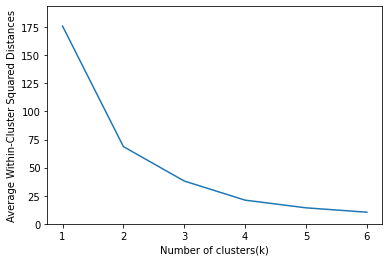

In [29]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

---
**Reference**

Shmueli, G., Bruce, P. C., Gedeck, P., and Patel, N. R. (2019). *Data Mining for Business Analytics: Concepts, Techniques and Applications in Python*. John Wiley & Sons, Inc.